In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_feather("resources/coffee_ratings_full.feather")
data

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,78.75,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,None,robustasa,None,...,Blue-Green,1.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1334,78.08,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,None,robustasa,40,...,Blue-Green,0.0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1336,75.08,Robusta,cafe politico,India,None,None,None,14-1118-2014-0087,cafe politico,None,...,Green,1.0,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### BOOTSTRAP'IN TEMEL KAVRAMLARI
1. **Yerine Koyarak Örnekleme**
 - Orijinal veriden rastgele örnekleme yapılır
 - Seçilen veriler yerine konur (aynı veri birden çok kez seçilebilir)
 - Örneklem boyutu orijinal veri boyutyla aynıdır.
2. **İterasyon Sayısı**
 - Genelde 1000 veya 10000 tekrar yapılır.
 - Daha fazla iterasyon daha fazla kararlı sonuçlar verir

In [3]:
data_focus = data[['variety','country_of_origin','flavor']]
data_focus = data_focus.reset_index()
data_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


In [4]:
data_resamp = data_focus.sample(frac=1,replace=True)
data_resamp

,index,variety,country_of_origin,flavor
1227,1227,Other,Guatemala,6.50
83,83,Bourbon,Guatemala,7.92
56,56,None,Ethiopia,8.08
37,37,None,United States (Hawaii),8.42
3,3,None,Ethiopia,8.58
...,...,...,...,...
1266,1266,Hawaiian Kona,United States (Hawaii),7.08
1230,1230,Bourbon,Guatemala,6.08
866,866,Caturra,Mexico,7.42
1206,1206,Caturra,Nicaragua,7.00


In [5]:
data_resamp.index.value_counts()

1180    6
1053    6
82      6
850     5
442     5
       ..
1258    1
675     1
839     1
1182    1
1256    1
Name: count, Length: 865, dtype: int64

In [6]:
num_unique_data = len(data_resamp.drop_duplicates(subset='index'))
num_unique_data

865

(array([  2.,  12.,  52., 144., 254., 245., 179.,  75.,  31.,   6.]),
 array([7.49387145, 7.5000284 , 7.50618535, 7.5123423 , 7.51849925,
        7.5246562 , 7.53081315, 7.5369701 , 7.54312706, 7.54928401,
        7.55544096]),
 <BarContainer object of 10 artists>)

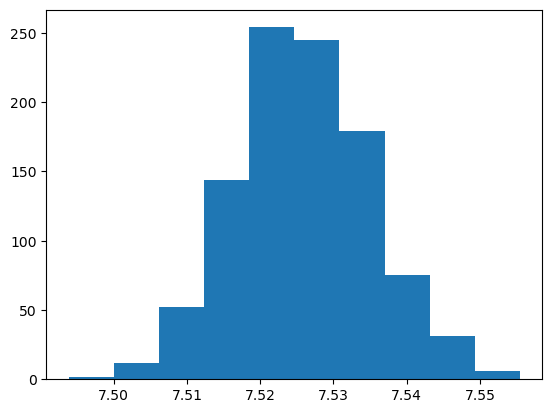

In [7]:
import numpy as np

mean_flavors_1000 = []

for _ in range(1000):
    mean_flavors_1000.append(
        np.mean(data_focus.sample(frac=1,replace=True)['flavor'])
    )
plt.hist(mean_flavors_1000)

In [8]:
data_sample = data[['variety','country_of_origin','flavor']].\
reset_index().\
sample(n=500)

data_sample

,index,variety,country_of_origin,flavor
19,19,Ethiopian Yirgacheffe,Ethiopia,8.17
1109,1109,Typica,Mexico,7.08
1092,1092,Hawaiian Kona,United States (Hawaii),7.50
511,511,Catuai,Costa Rica,7.58
669,669,Caturra,Guatemala,7.33
...,...,...,...,...
97,97,Caturra,Colombia,7.92
899,899,Other,"Tanzania, United Republic Of",7.42
999,999,Bourbon,El Salvador,7.08
747,747,Bourbon,Mexico,7.58


In [9]:
mean_flavors_5000= []

for _ in range(5000):
    mean_flavors_5000.append(
        np.mean(data_sample.sample(frac=1,replace=True)['flavor'])
    )

In [10]:
data_sample['flavor'].mean()

7.525

In [11]:
np.mean(mean_flavors_5000)

7.524977744000001

In [12]:
data_sample['flavor'].std()

0.32718664735042124

In [13]:
np.std(mean_flavors_5000) # Standart Hata

0.014456983265898319

In [14]:
np.std(mean_flavors_5000, ddof=1) * np.sqrt(500) # Bootstrap standart sapma = Standart Hata * np.sqrt(n)

0.3233003049684156

##### Alıştırma

In [15]:
np.random.seed(42)
data = {
    'product': ['A','B','C'] * 100,
    'rating': np.random.normal(7,1.5,300),
    'region': np.random.choice(['North','South','East','West'],300)
}
df = pd.DataFrame(data)

In [16]:
# Temel bootstrap örneklem
# Yerine koyarak örnekleme
bootstrap_sample = df.sample(frac=1, replace=True)
print('\nOrijinal veri boyutu:',df.shape[0])
print('Bootstrap örneklem boyutu',bootstrap_sample.shape[0])
print('\nTekrarlanan değerlerin analizi:')
print(bootstrap_sample.index.value_counts().head())


Orijinal veri boyutu: 300
Bootstrap örneklem boyutu 300

Tekrarlanan değerlerin analizi:
110    6
94     5
117    4
156    4
77     4
Name: count, dtype: int64


In [17]:
# Bootstrap dağılımı oluşturma
mean_ratings_1000 = []
for _ in range(1000):
    mean_ratings_1000.append(
        np.mean(df.sample(frac=1,replace=True)['rating'])
    )

(array([ 3.,  2.,  8.,  9., 15., 11., 15., 41., 46., 53., 77., 82., 89.,
        73., 93., 70., 73., 66., 51., 33., 34., 24., 16.,  7.,  3.,  3.,
         2.,  0.,  0.,  1.]),
 array([6.73511536, 6.75379956, 6.77248376, 6.79116795, 6.80985215,
        6.82853635, 6.84722054, 6.86590474, 6.88458894, 6.90327314,
        6.92195733, 6.94064153, 6.95932573, 6.97800992, 6.99669412,
        7.01537832, 7.03406251, 7.05274671, 7.07143091, 7.0901151 ,
        7.1087993 , 7.1274835 , 7.14616769, 7.16485189, 7.18353609,
        7.20222028, 7.22090448, 7.23958868, 7.25827287, 7.27695707,
        7.29564127]),
 <BarContainer object of 30 artists>)

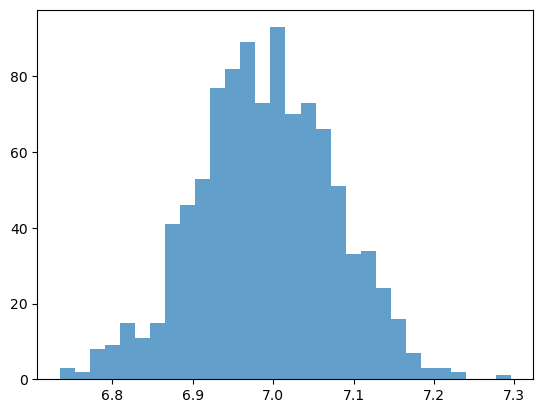

In [18]:
plt.hist(mean_ratings_1000,bins=30,alpha=0.7)

In [19]:
# Örneklem vs bootstrap karşılaştırması
sample_data = df.sample(n=100)

# ilk örneklem
print("\nİlk örneklemin ortalaması:", sample_data['rating'].mean())


İlk örneklemin ortalaması: 7.067860638525349


In [20]:
# bootstrap örneklemler
bootstrap_means = []
for _ in range(5000):
    bootstrap_means.append(
        np.mean(df.sample(frac=1,replace=True)['rating'])
    )
print("Bootstrap ortalama:",np.mean(bootstrap_means))

Bootstrap ortalama: 6.992177049890661


In [21]:
# Standart Hata ve Standart Sapma
sample_data['rating'].std()

1.4113213523402184

In [22]:
np.std(bootstrap_means, ddof=1) # standart hata

0.08500373809179516

In [23]:
np.std(bootstrap_means, ddof=1)*np.sqrt(100) # Bootstrap standart sapma

0.8500373809179517

In [24]:
# Güven Aralığı
confidence_interval = np.percentile(bootstrap_means,[2.5, 97.5])

lower_ci = confidence_interval[0]
upper_ci = confidence_interval[1]

print(f"Alt Sınır: {lower_ci:.2f}")
print(f"Üst Sınır: {upper_ci:.2f}")

Alt Sınır: 6.83
Üst Sınır: 7.16


(array([  10.,   65.,  265.,  776., 1323., 1386.,  793.,  309.,   66.,
           7.]),
 array([7.47138 , 7.482036, 7.492692, 7.503348, 7.514004, 7.52466 ,
        7.535316, 7.545972, 7.556628, 7.567284, 7.57794 ]),
 <BarContainer object of 10 artists>)

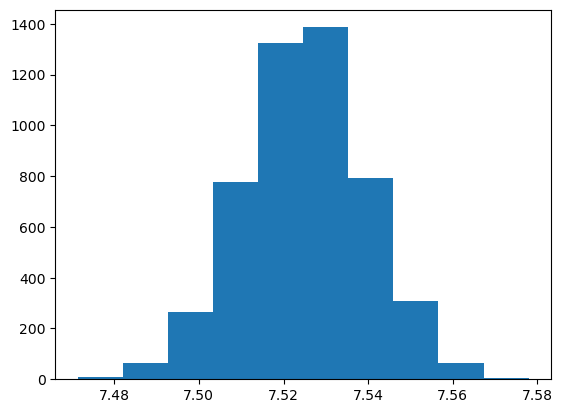

In [25]:
plt.hist(mean_flavors_5000) # 5000 bootstrap örnekleminin ortalamalarının dağılımını gösterir.

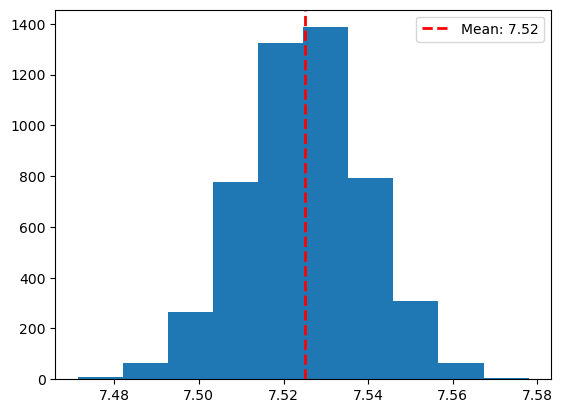

In [26]:
# Dağılıma ortlama değeri dikey çizgi olarak ekler
plt.hist(mean_flavors_5000)
plt.axvline(np.mean(mean_flavors_5000), color='red', linestyle='dashed',
            linewidth=2, label=f'Mean: {np.mean(mean_flavors_5000):.2f}')
plt.legend()

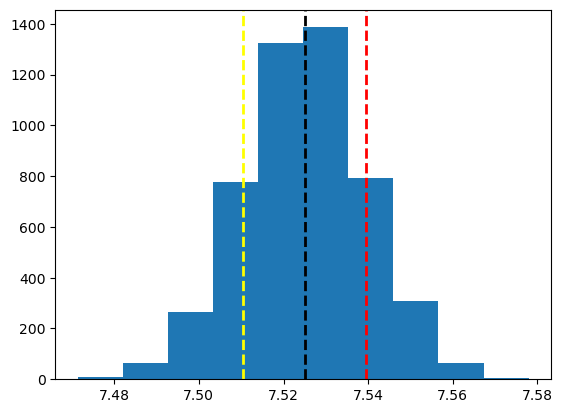

In [27]:
# Ortalama ± 1 standart sapma aralığını gösterir
# Bu aralık verilerin yaklaşık %68'ini kapsar
mean = np.mean(mean_flavors_5000)
plus_one_std = mean + np.std(mean_flavors_5000, ddof=1)
minus_one_std = mean - np.std(mean_flavors_5000, ddof=1)

plt.hist(mean_flavors_5000)
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2)
plt.axvline(plus_one_std, color='red', linestyle='dashed', linewidth=2)
plt.axvline(minus_one_std, color='yellow', linestyle='dashed', linewidth=2)

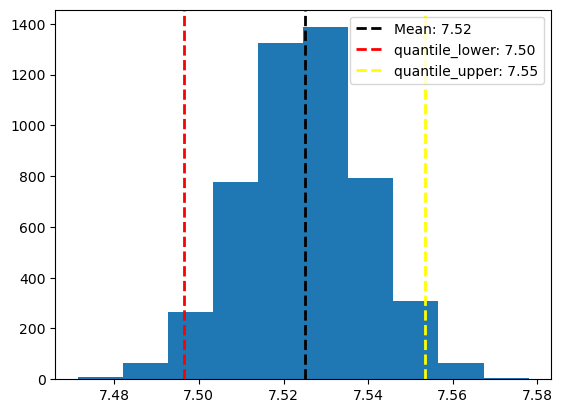

In [28]:
# Yüzdelik dilim Quantile yöntemi
# %95 güven aralığını hesaplar
# Alt sınır: 2.5 yüzdelik dilim
# Üst sınır: 97.5 yüzdelik dilim

quantile_lower = np.quantile(mean_flavors_5000, 0.025)
quantile_upper = np.quantile(mean_flavors_5000, 0.975)

plt.hist(mean_flavors_5000)

plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(quantile_lower, color='red', linestyle='dashed', linewidth=2, label=f'quantile_lower: {quantile_lower:.2f}')

plt.axvline(quantile_upper, color='yellow', linestyle='dashed', linewidth=2, label=f'quantile_upper: {quantile_upper:.2f}')

plt.legend()

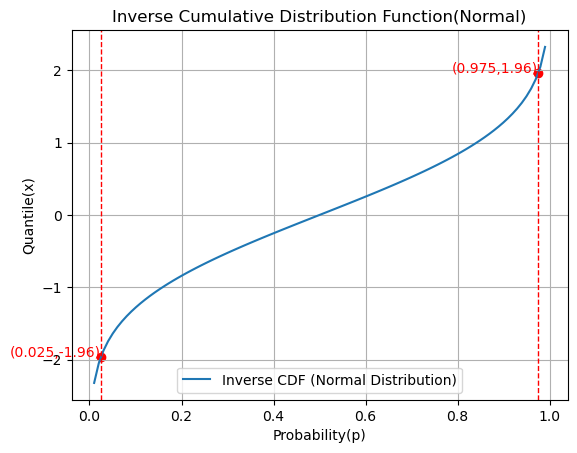

In [29]:
# Ters kümülatif dağılım fonksiyonu ve güven aralıkları
from scipy.stats import norm
# 0-1 arasında olasılık değerleri oluştur
p_values = np.linspace(0,1,100)

# Her olasılık için karşılık gelen normal dağılım değerlerini hesapla
quantiles = norm.ppf(p_values, loc=0, scale=1)

plt.plot(p_values, quantiles, label="Inverse CDF (Normal Distribution)")

p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1)
quantile_975 = norm.ppf(p2)

plt.scatter([p1,p2],[quantile_025,quantile_975],color='red')
plt.axvline(p1,color='red',linestyle='dashed',linewidth=1)
plt.axvline(p2,color='red',linestyle='dashed',linewidth=1)

plt.text(p1,quantile_025,f'({p1:.3f},{quantile_025:.2f})',color='red',fontsize=10,ha='right')
plt.text(p2,quantile_975,f'({p2:.3f},{quantile_975:.2f})',color='red',fontsize=10,ha='right')

plt.xlabel("Probability(p)")
plt.ylabel("Quantile(x)")
plt.title("Inverse Cumulative Distribution Function(Normal)")
plt.grid(True)
plt.legend()
plt.show()

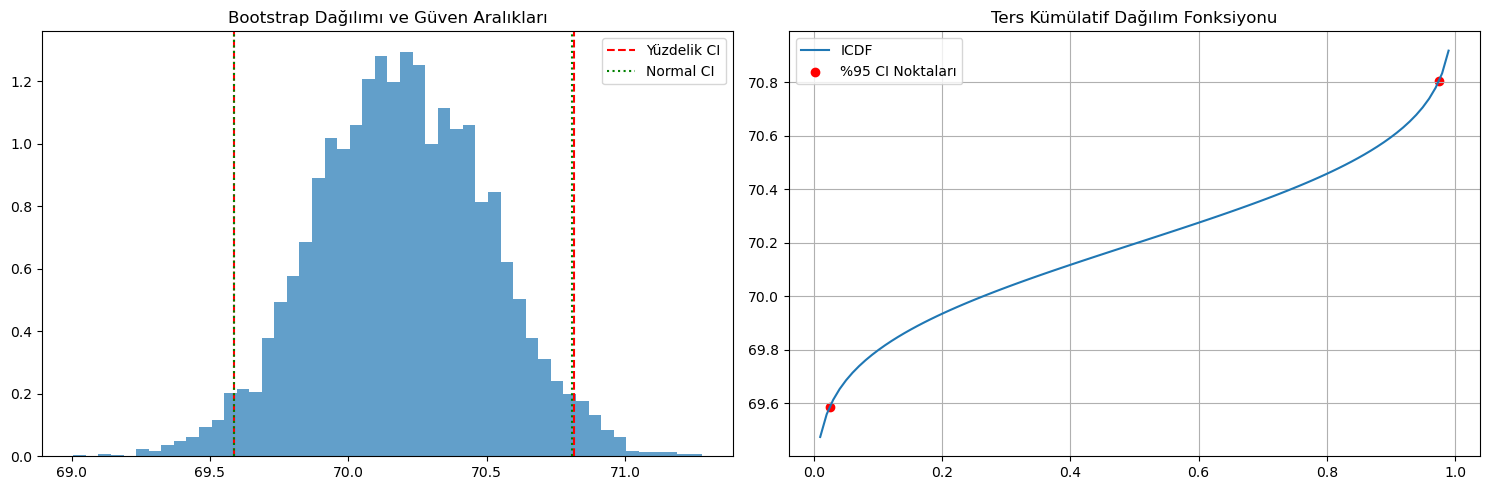

In [30]:
np.random.seed(42)
test_scores = np.random.normal(70,10,1000)

mean_scores = []
for _ in range(5000):
    mean_scores.append(
        np.mean(np.random.choice(test_scores, size=len(test_scores), replace=True))
    )
# İki yöntemle güven aralığı hesaplama
# 1. Yüzdelik dilim yöntemi
quantile_ci = np.percentile(mean_scores, [2.5,97.5])
# 2. Standart hata yöntemi
mean_estimate = np.mean(mean_scores)
std_error = np.std(mean_scores, ddof=1)
normal_ci = [
    norm.ppf(0.025, loc=mean_estimate, scale=std_error),
    norm.ppf(0.975, loc=mean_estimate, scale=std_error)
]

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(mean_scores, bins=50, density=True, alpha=0.7)
plt.axvline(quantile_ci[0], color='red', linestyle='--', label='Yüzdelik CI')
plt.axvline(quantile_ci[1], color='red', linestyle='--')
plt.axvline(normal_ci[0], color='green', linestyle=':', label='Normal CI')
plt.axvline(normal_ci[1], color='green', linestyle=':')
plt.title('Bootstrap Dağılımı ve Güven Aralıkları')
plt.legend()

plt.subplot(122)
p_values = np.linspace(0, 1, 100)
quantiles = norm.ppf(p_values, loc=mean_estimate, scale=std_error)
plt.plot(p_values, quantiles, label="ICDF")
plt.scatter([0.025, 0.975], [normal_ci[0], normal_ci[1]], color='red', label='%95 CI Noktaları')
plt.title('Ters Kümülatif Dağılım Fonksiyonu')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
scores = np.random.normal(70, 10, 100)

top_10_scores = norm.ppf(0.90, loc=70, scale=10)
top_10_scores

82.815515655446

In [32]:
passing_score = norm.ppf(0.30, loc=70, scale=10)
passing_score

64.75599487291959

In [33]:
# Yorum:
# Bu sınıfta 83 ve üzeri alan öğrenciler %10'luk dilime giriyor
# Öğrencilerin %30'u 65 puanın altında bir nota sahip

In [34]:
rain_median = norm.ppf(0.50, loc=50, scale=15)
rain_extreme = norm.ppf(0.99, loc=50, scale=15)
print(f"Yılın yarısında yağış miktarı {rain_median:.1f} mm altında")
print(f"Yılda sadece %1 olasılıkla {rain_extreme:.1f} mm üzeri yağış görülür")

Yılın yarısında yağış miktarı 50.0 mm altında
Yılda sadece %1 olasılıkla 84.9 mm üzeri yağış görülür


In [35]:
heights_95_interval = [
    norm.ppf(0.025, loc=175, scale=8),
    norm.ppf(0.975, loc=175, scale=8)
]
print(f"Boy için %95 güven aralığı: ({heights_95_interval[0]:.1f} cm, {heights_95_interval[1]:.1f} cm)")

Boy için %95 güven aralığı: (159.3 cm, 190.7 cm)


In [36]:
# Popülasyonun %95'inin boyu 159 cm ile 191 cm arasındadır.
# 159 cm'den kısa ve 191 cm'den uzun olmak nadir bir durumdur.
# Bu aralık dışında kalan birisi istisnai durum olarak değerlendirilebilir

**ÖRNEK ALIŞTIRMALAR**

In [37]:
# Örnek1: Maaş Dağılım Analizi
salary_data = pd.Series(np.random.normal(5000, 800, 1000))

mean_salaries = []

for _ in range(5000):
    mean_salaries.append(
        np.mean(
            salary_data.sample(frac=1, replace=True)
        )
    )
print(f"Seri ortlaması: {salary_data.mean():.1f}")
print(f"Bootstrap ortalaması: {np.mean(mean_salaries):.1f}")

Seri ortlaması: 5002.6
Bootstrap ortalaması: 5003.1


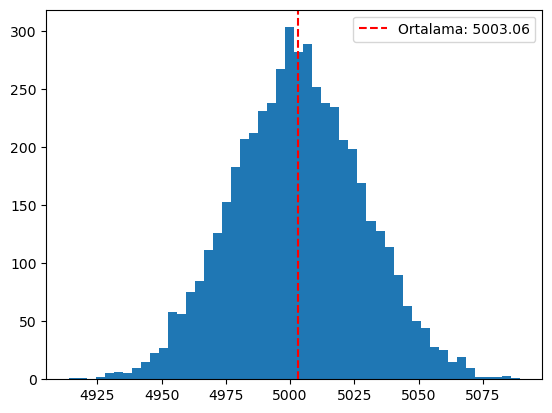

In [38]:
plt.hist(mean_salaries, bins=50)
plt.axvline(np.mean(mean_salaries), color='red', linestyle='dashed', label=f'Ortalama: {np.mean(mean_salaries):.2f}')
plt.legend()

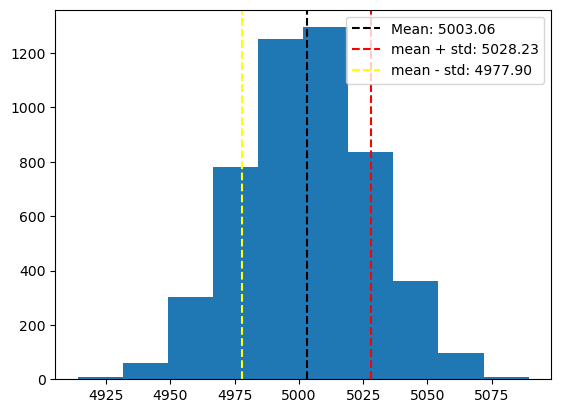

In [39]:
mean = np.mean(mean_salaries)
plus_one_std = mean + np.std(mean_salaries, ddof=1)
minus_one_std = mean - np.std(mean_salaries, ddof=1)

plt.hist(mean_salaries);

plt.axvline(mean, color='black', linestyle='dashed', label=f'Mean: {mean:.2f}')

plt.axvline(plus_one_std, color='red', linestyle='dashed', label=f'mean + std: {plus_one_std:.2f}')

plt.axvline(minus_one_std, color='yellow', linestyle='dashed', label=f'mean - std: {minus_one_std:.2f}')

plt.legend()
plt.show()

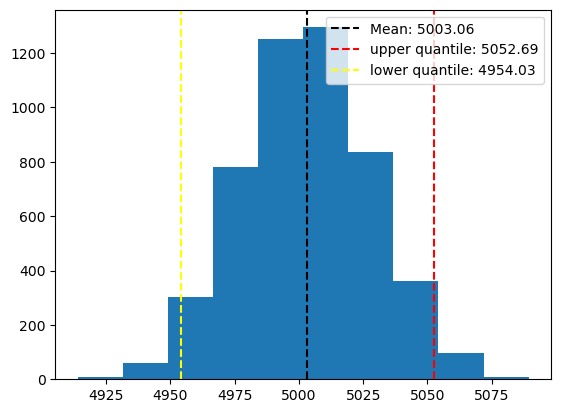

In [40]:
quantile_lower = np.quantile(mean_salaries, 0.025)
quantile_upper = np.quantile(mean_salaries, 0.975)

plt.hist(mean_salaries);

plt.axvline(mean, color='black', linestyle='dashed', label=f'Mean: {mean:.2f}')

plt.axvline(quantile_upper, color='red', linestyle='dashed', label=f'upper quantile: {quantile_upper:.2f}')

plt.axvline(quantile_lower, color='yellow', linestyle='dashed', label=f'lower quantile: {quantile_lower:.2f}')


plt.legend()
plt.show()

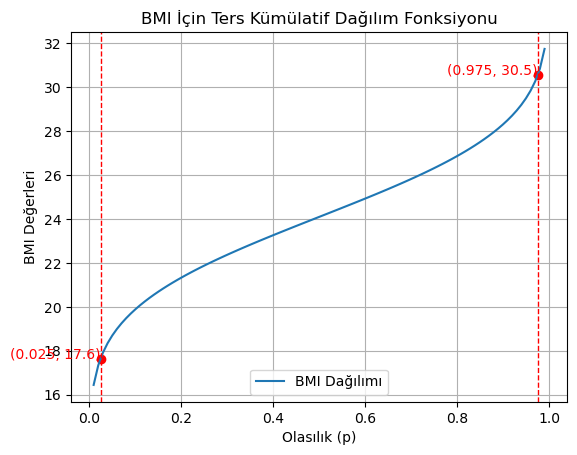

%95 güvenilirlikle öğrencilerin vücut kitle indeks aralığı (17.6, 30.5)


In [41]:
bmi_data = np.random.normal(24,3,100) # Body Mass Index ( Vücut Kitle İndeksi )

p_values = np.linspace(0,1,100)
quantiles = norm.ppf(p_values, loc=np.mean(bmi_data), scale=np.std(bmi_data))

plt.plot(p_values, quantiles, label='BMI Dağılımı')
         
p1, p2 = 0.025, 0.975
quantile_025 = norm.ppf(p1, loc=np.mean(bmi_data), scale=np.std(bmi_data))
quantile_975 = norm.ppf(p2, loc=np.mean(bmi_data), scale=np.std(bmi_data))

plt.scatter([p1, p2], [quantile_025, quantile_975], color='red')
plt.axvline(p1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(p2, color='red', linestyle='dashed', linewidth=1)

plt.text(p1, quantile_025, f'({p1:.3f}, {quantile_025:.1f})', color='red', fontsize=10, ha='right')
plt.text(p2, quantile_975, f'({p2:.3f}, {quantile_975:.1f})', color='red', fontsize=10, ha='right')

plt.xlabel("Olasılık (p)")
plt.ylabel("BMI Değerleri")
plt.title("BMI İçin Ters Kümülatif Dağılım Fonksiyonu")
plt.grid(True)
plt.legend()
plt.show()

print(f"%95 güvenilirlikle öğrencilerin vücut kitle indeks aralığı ({quantile_025:.1f}, {quantile_975:.1f})")

**SORU1:**
Bir spor merkezindeki üyelerin vücut kitle indeks(Body Mass Index) değerlerini analiz ediyorsunuz. BMI kategorileri
şu şekildedir:
- 18.5 altı: Düşük kilolu
- 18.5 - 24.9: Normal kilolu
- 25 - 29.9: Fazla kilolu
- 30 ve üzeri: Obez

ICDF kullanarak bu değer aralıklarını gösteren ve aşağıdaki özelliklere sahip bir grafik
oluşturunuz:
- BMI kategori sınırlarını dikey çizgilerle gösteriniz.
- Her kategorinin olasılık değerlerini grafikte gösteriniz.
- Grafikteki değerleri yorumlayınız.

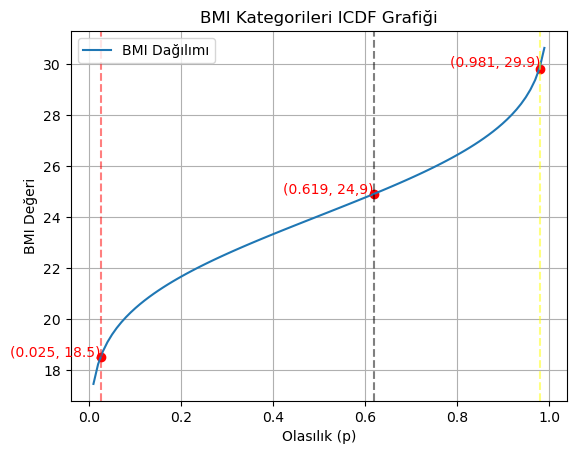

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

bmi_data = np.random.normal(24, 3, 1000)

# 0-1 arasında 100 olasılık değeri oluşturur
p_values = np.linspace(0, 1, 100) 

# Gerçek BMI değerlerini görmemizi sağlar
quantiles = norm.ppf(p_values, loc=np.mean(bmi_data), scale=np.std(bmi_data))

# BMI kategori sınırlarına karşılık gelen olasılık değerlerini hesapla
# Standartlaştırılmış z-skorları kullanarak olasılıkları hesapla
p_18_5 = norm.cdf(18.5, loc=np.mean(bmi_data), scale=np.std(bmi_data))
p_24_9 = norm.cdf(24.9, loc=np.mean(bmi_data), scale=np.std(bmi_data))
p_29_9 = norm.cdf(29.9, loc=np.mean(bmi_data), scale=np.std(bmi_data))

plt.plot(p_values, quantiles, label="BMI Dağılımı")
             
# Kategorik sınırların dikey çizgilerini çeker
plt.axvline(x=p_18_5, color='red', linestyle='dashed', alpha=0.5)
plt.axvline(x=p_24_9, color='black', linestyle='dashed', alpha=0.5)
plt.axvline(x=p_29_9, color='yellow', linestyle='dashed', alpha=0.5)

# (Olasılık, Kategorik) değerlerini x,y ikilisi olarak görelim
plt.text(p_18_5, 18.5, f'({p_18_5:.3f}, 18.5)', color='red', fontsize=10, ha='right')
plt.text(p_24_9, 24.9, f'({p_24_9:.3f}, 24,9)', color='red', fontsize=10, ha='right')
plt.text(p_29_9, 29.9, f'({p_29_9:.3f}, 29.9)', color='red', fontsize=10, ha='right')

# Noktaları Çiz
plt.scatter([p_18_5, p_24_9, p_29_9], [18.5, 24.9, 29.8], color='red')

plt.title('BMI Kategorileri ICDF Grafiği')
plt.xlabel('Olasılık (p)')
plt.ylabel('BMI Değeri')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
# Sonuçları yazdıralım
print(f"Düşük Kilolu: %{p_18_5*100:.1f}")
print(f"Normal Kilolu: %{(p_24_9 - p_18_5)*100:.1f}")
print(f"Yüksek Kilolu: %{(p_29_9 - p_24_9)*100:.1f}")
print(f"Obez: %{(1 - p_29_9)*100:.1f}")

Düşük Kilolu: %2.5
Normal Kilolu: %59.4
Yüksek Kilolu: %36.1
Obez: %1.9


**SORU2:**
Bir sağlık araştırmasında, yetişkin popülasyonun Vücut Kitle İndeksi (BMI) dağılımı
normal dağılıma uymaktadır. (ortlama=24, standart sapma=3)

- ICDF kullanarak, popülasyonun:
    - En düşük %10'luk dilimini
    - Ortadaki %50'lik dilimini
    - En yüksek %10'luk diliminin BMI değerlerini hesaplayınız ve grafikte gösteriniz.
- Hesapladığınız değerleri klinik BMI kategorisiyle karşılaştırarak yorumlayınız.

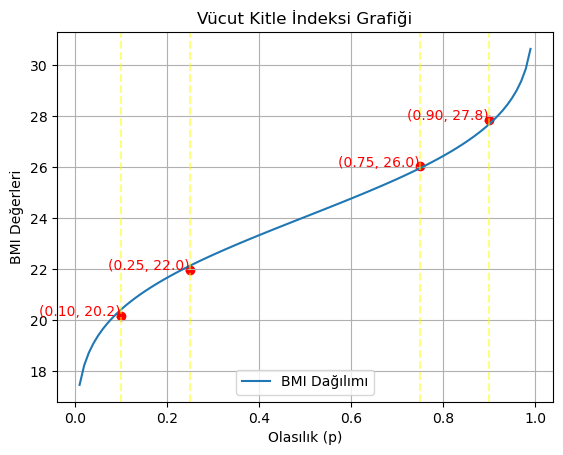

En düşük %10'luk dilim: 20.2 BMI Altı
Alt çeyrek %25'lik dilim: 22.0 BMI
Alt çeyrek %75'lik dilim: 26.0 BMI
En yüksek %10'luk dilim: 27.8 BMI üstü


In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

bmi_data = np.random.normal(24, 3, 1000)

# ICDF grafiği için olasılık değerleri
p_values = np.linspace(0, 1, 100)

critical_points = [0.10, 0.25, 0.75, 0.90]

# ICDF grafiği için BMI değeleri
# p_values olasılıklarını kullanarak quantiller hesaplanır
qauntiles = norm.ppf(p_values, loc=24, scale=3)

# critical_points olasılıkları kullanılarak Z-Score(BMI Değerleri) hesaplanır
critical_bmi = norm.ppf(critical_points, loc=24, scale=3)

plt.plot(p_values, quantiles, label='BMI Dağılımı')

# Grafiği çizer
plt.scatter([critical_points], [critical_bmi], color='red')

# Dikey çizgiler
for p, bmi in zip(critical_points, critical_bmi):
    plt.axvline(x=p, color='yellow', linestyle='dashed', alpha=0.5)
    plt.text(p, bmi, f'({p:.2f}, {bmi:.1f})', color='red', fontsize=10, ha='right')

plt.title('Vücut Kitle İndeksi Grafiği')
plt.xlabel('Olasılık (p)')
plt.ylabel('BMI Değerleri')
plt.grid(True)
plt.legend()
plt.show()

print(f"En düşük %10'luk dilim: {critical_bmi[0]:.1f} BMI Altı")
print(f"Alt çeyrek %25'lik dilim: {critical_bmi[1]:.1f} BMI")
print(f"Alt çeyrek %75'lik dilim: {critical_bmi[2]:.1f} BMI")
print(f"En yüksek %10'luk dilim: {critical_bmi[3]:.1f} BMI üstü")